In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,NaN,NaN,NaN
3482,ham,"Hello, my love! How goes that day ? I wish you...",NaN,NaN,NaN
3256,ham,"No, but you told me you were going, before you...",NaN,NaN,NaN
861,ham,Your brother is a genius,NaN,NaN,NaN
981,ham,Reckon need to be in town by eightish to walk ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data Cleaning
# 2.Data Analysis
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Inprovement
# 7.Website
# 8.Deploy

# 1.Data Cleaning

In [6]:
df.info() #To check is the null columns useful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4572,spam,\URGENT! This is the 2nd attempt to contact U!...
3925,ham,I havent add Ì_ yet right..
1755,ham,Really good:)dhanush rocks once again:)
2019,ham,From tomorrow onwards eve 6 to 3 work.
329,ham,I'm reading the text i just sent you. Its mean...


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2': 'text'},inplace=True)
df.sample(5)

,target,text
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
2787,ham,"Forgot it takes me 3 years to shower, sorry. W..."
3295,ham,Hi there. We have now moved in2 our pub . Woul...
1054,ham,HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...
2347,ham,But i dint slept in afternoon.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for Duplicate Values
df.duplicated().sum()

403

In [15]:
#remove Duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

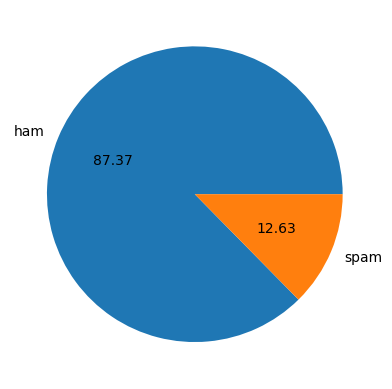

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is Imbalanced

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
# Fetch Number of Words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

In [ ]:
# Analysis for Ham Messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

In [ ]:
# Analysis for Spam Messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

# 3.Data Preprocessing
    Lower Case
    Tokenization
    Removing Special Characters
    Removing stop words and Punctuation
    Stemming

In [ ]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
        
    return " ".join(y)

In [ ]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

# 4. Model Building

## Model for Support Vector Classifier(SVC)
    vectorize the transformed_text Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
# Train Test Application
from sklearn.model_selection import train_test_split

In [ ]:
y=df['target'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
svc_model=LinearSVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer_2.pkl','wb'))
# pickle.dump(svc_model,open('model_2.pkl','wb'))